In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn import preprocessing as prep

# Food Example

## Import food_df

In [60]:
sheet_id = '1goqktYEUI2BSk_sxPsNxU3QfMn_8zohcJCzDZ0b61xs'
sheet_name = 'DS008'
url =  f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
food_df = pd.read_csv(url, index_col='student', nrows=14)
food_df.drop(['favorite_color'], axis=1, inplace=True)
food_df

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
student,,,,,,,,,,
Alex,8,9,2,9,6,7,8,9,9,34
Christopher,8,8,5,3,4,5,10,10,8,37
Iuri,8,7,5,3,3,5,6,8,1,37
Jacqueline,7,8,8,3,0,7,8,10,3,34
Jari,7,8,9,1,2,6,8,3,2,39
Mo,0,0,7,0,8,4,9,3,4,27
Levent,7,9,6,2,4,5,10,10,0,43
Natalia,10,7,6,0,5,7,9,0,0,41
Radka,9,8,0,0,6,1,8,0,3,33


##  compare heatmap with and without age column

In [61]:
#prepare edist_df for no_age_food columns
no_age_food_df = food_df.drop("age",axis=1).copy()
no_age_food_edis_df = pd.DataFrame(
    pairwise_distances(no_age_food_df,metric="euclidean")
    ,index=no_age_food_df.index
    ,columns=no_age_food_df.index
    )

In [62]:
#prepare edist_df for food columns
food_edis_df = pd.DataFrame(
    pairwise_distances(food_df,metric="euclidean")
    ,index=food_df.index
    ,columns=food_df.index
    )

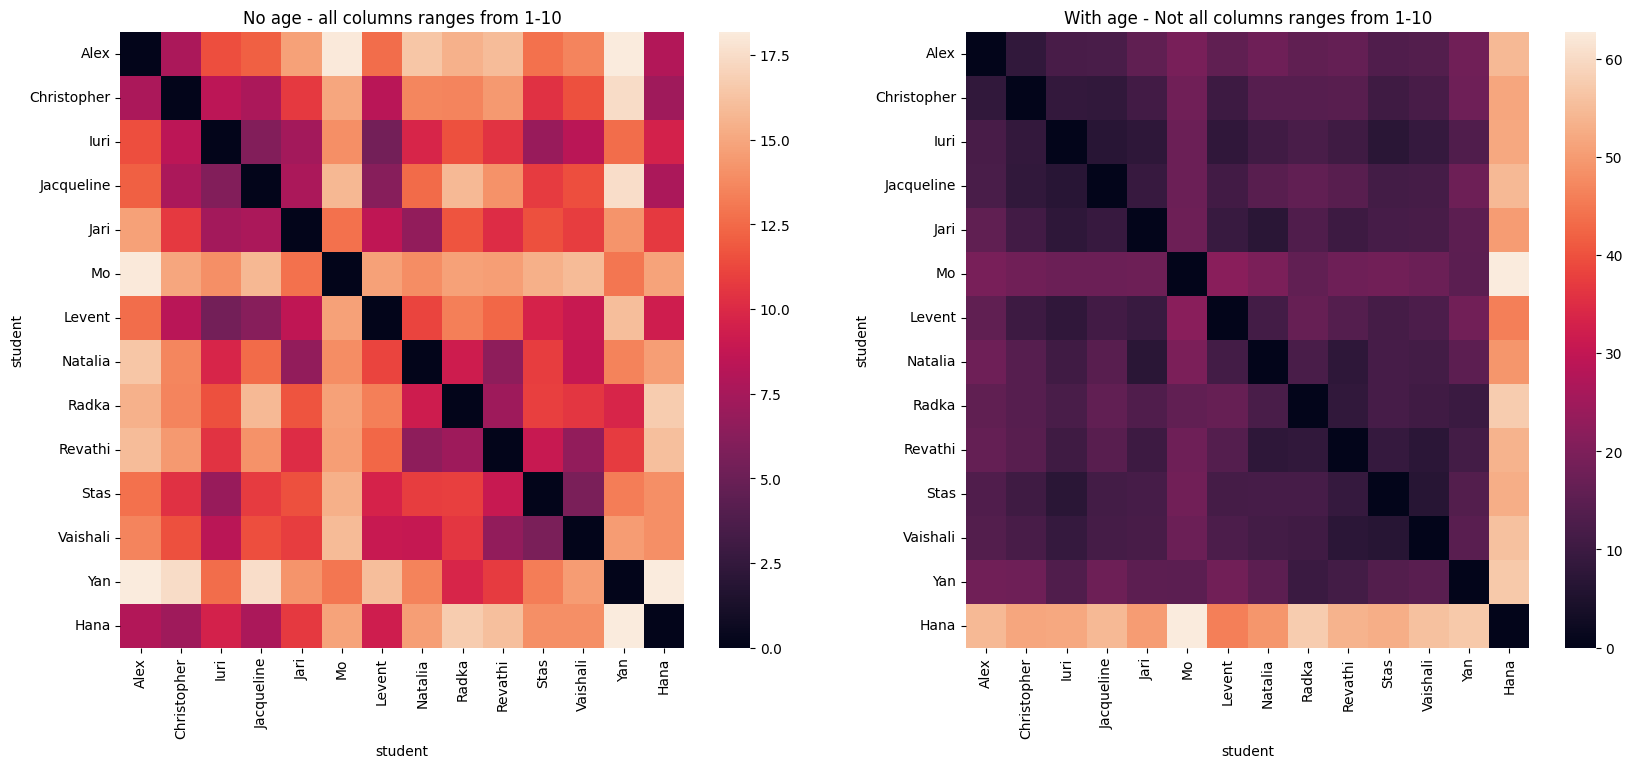

In [63]:
# plot both edist together
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (20,8))
sns.heatmap(no_age_food_edis_df,ax=ax1)
sns.heatmap(food_edis_df,ax=ax2)
ax1.set_title("No age - all columns ranges from 1-10")
ax2.set_title("With age - Not all columns ranges from 1-10")
plt.show()
#clear that the age column covered all data in other columns

## Use Scalers
Scalers do not change the distribution of the data, they change the range of the data

### MinMax Scaler
All columns get scaled between min and max (default 0 and 1)
MinMaxScaler subtracts the minimum value in the feature and then divides by the range. 
The range is the difference between the original maximum and original minimum.

MinMaxScaler **preserves the shape of the original distribution**. 
It doesn’t meaningfully change the information embedded in the original data.

MinMaxScaler **doesn’t reduce the importance of outliers**.

$newValue = \frac{oldValue - min(column)}{max(column) - min(column)}$

> **when to use**
MinMaxScaler isn’t a bad place to start unless:
>- you know you want your feature to have a normal distribution.
>- or you have outliers and you want them to have reduced influence.


#### Use Scaler

In [64]:
# init the transformer instance , define min/max values , type of output.
minmax_scaler = prep.MinMaxScaler(feature_range=(0,1)).set_output(transform='pandas')

In [83]:
# the scaler learn about the df and store min/max for each feature
minmax_scaler.fit(food_df)
pd.DataFrame(
    {
        "features":minmax_scaler.feature_names_in_,
        "scale":minmax_scaler.scale_,
        "minAdjust":minmax_scaler.min_,
        "data min":minmax_scaler.data_min_,
        "data max":minmax_scaler.data_max_,
        "data range":minmax_scaler.data_range_
    }
)

,features,scale,minAdjust,data min,data max,data range
0,broccoli,0.100000,0.000000,0.0,10.0,10.0
1,brussels_sprouts,0.111111,0.000000,0.0,9.0,9.0
2,hamburger (meat),0.111111,0.000000,0.0,9.0,9.0
3,oysters (raw),0.111111,0.000000,0.0,9.0,9.0
4,onion (raw),0.125000,0.000000,0.0,8.0,8.0
5,peas,0.111111,0.000000,0.0,9.0,9.0
6,olives,0.142857,-0.428571,3.0,10.0,7.0
7,blue_cheese,0.100000,0.000000,0.0,10.0,10.0
8,whisky,0.111111,0.000000,0.0,9.0,9.0
9,age,0.016393,-0.442623,27.0,88.0,61.0


In [66]:
# Use the fitted transformer to actually transform the data.
food_minmax_df = minmax_scaler.transform(food_df)

#### Compare scaled with unscaled features

##### Compare values

In [67]:
#display the features feature before and after the transformation
round(pd.DataFrame(
    {
        "orig_age":food_df.loc[:,"age"],
        "minmax_scaled_age":food_minmax_df.loc[:,"age"],
        "orig_broccoli":food_df.loc[:,"broccoli"],
        "minmax_scaled_broccoli":food_minmax_df.loc[:,"broccoli"]
    }
).sort_values(by="orig_age"),3)

,orig_age,minmax_scaled_age,orig_broccoli,minmax_scaled_broccoli
student,,,,
Mo,27,0.000,0,0.0
Radka,33,0.098,9,0.9
Alex,34,0.115,8,0.8
Jacqueline,34,0.115,7,0.7
Vaishali,34,0.115,9,0.9
Yan,34,0.115,4,0.4
Christopher,37,0.164,8,0.8
Iuri,37,0.164,8,0.8
Revathi,37,0.164,8,0.8


In [68]:
round(food_minmax_df,3)

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
student,,,,,,,,,,
Alex,0.8,1.000,0.222,1.000,0.750,0.778,0.714,0.9,1.000,0.115
Christopher,0.8,0.889,0.556,0.333,0.500,0.556,1.000,1.0,0.889,0.164
Iuri,0.8,0.778,0.556,0.333,0.375,0.556,0.429,0.8,0.111,0.164
Jacqueline,0.7,0.889,0.889,0.333,0.000,0.778,0.714,1.0,0.333,0.115
Jari,0.7,0.889,1.000,0.111,0.250,0.667,0.714,0.3,0.222,0.197
Mo,0.0,0.000,0.778,0.000,1.000,0.444,0.857,0.3,0.444,0.000
Levent,0.7,1.000,0.667,0.222,0.500,0.556,1.000,1.0,0.000,0.262
Natalia,1.0,0.778,0.667,0.000,0.625,0.778,0.857,0.0,0.000,0.230
Radka,0.9,0.889,0.000,0.000,0.750,0.111,0.714,0.0,0.333,0.098


##### Compare distribution (Hist)

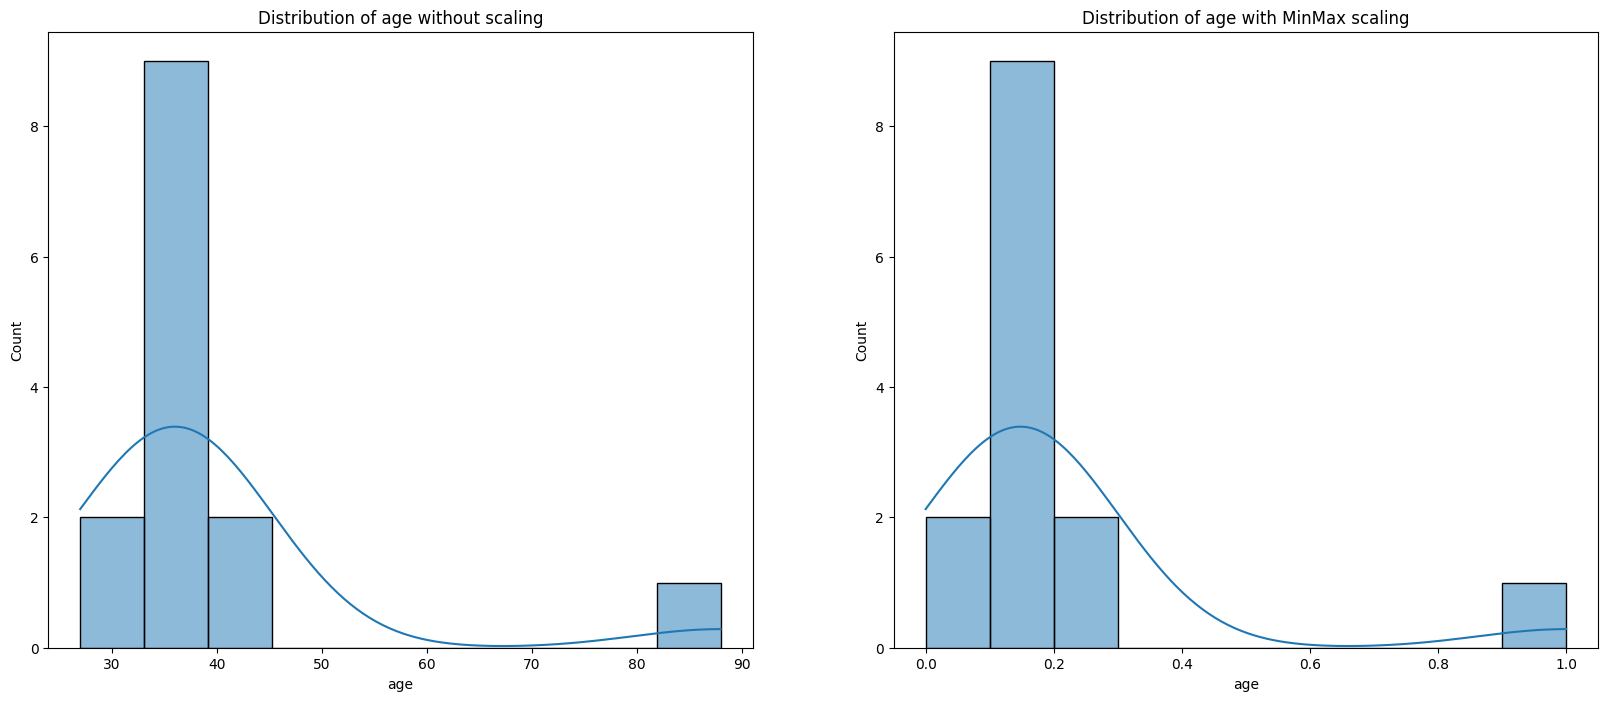

In [69]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(20,8))
sns.histplot(data=food_df.loc[:,"age"],bins=10,kde=True,ax=ax1)
sns.histplot(data=food_minmax_df.loc[:,"age"],bins=10,kde=True,ax=ax2)

ax1.set_title("Distribution of age without scaling")
ax2.set_title("Distribution of age with MinMax scaling")
plt.show()

##### Compare heatmap

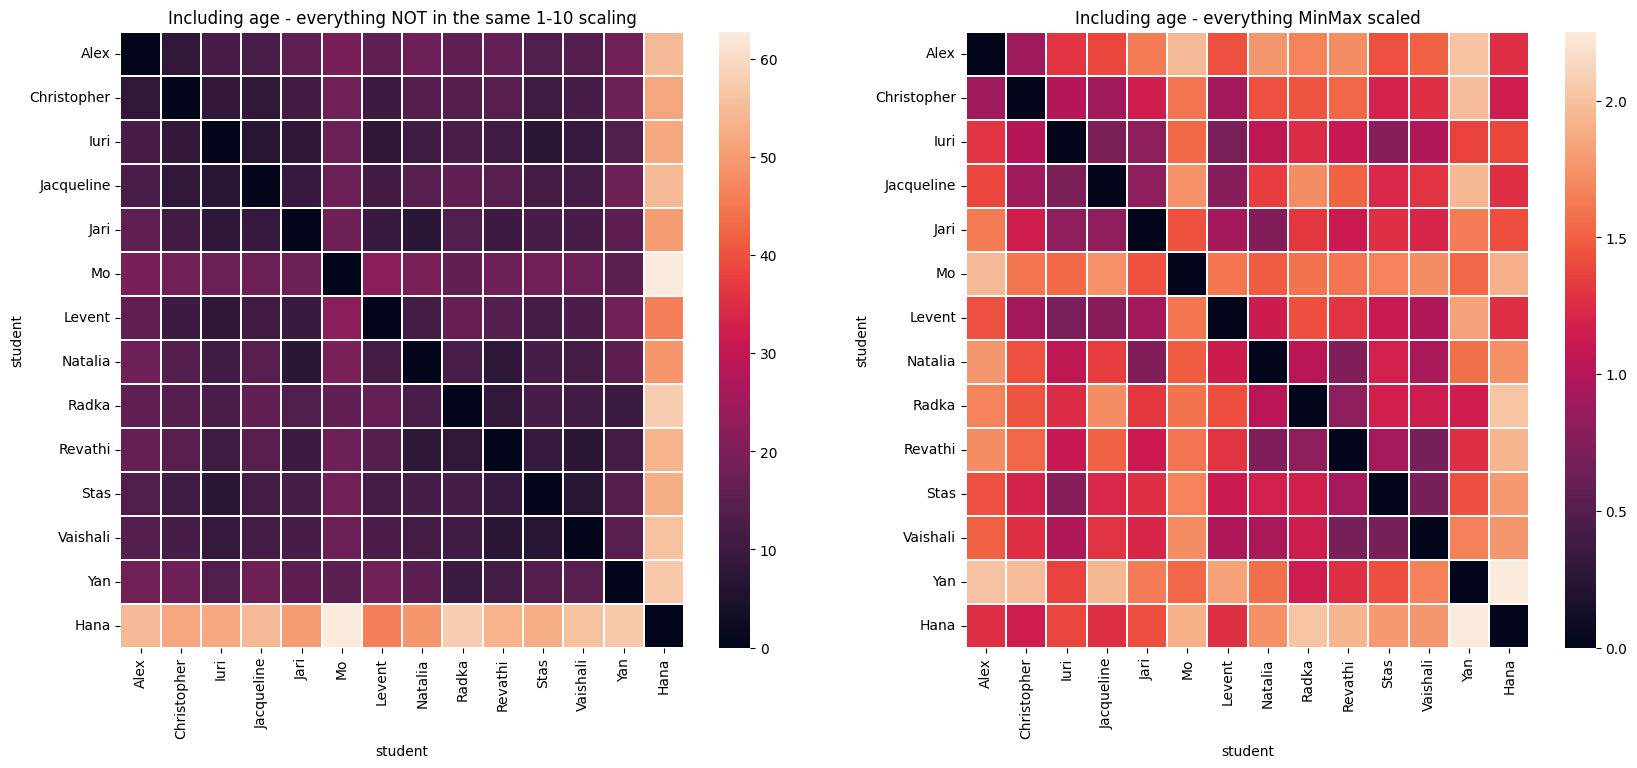

In [70]:
food_minmax_edis_df = pd.DataFrame(pairwise_distances(food_minmax_df),index=food_minmax_df.index,columns=food_minmax_df.index)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(food_edis_df, ax=ax1, linewidths=.2);
sns.heatmap(food_minmax_edis_df, ax=ax2, linewidths=.2);
ax1.set_title('Including age - everything NOT in the same 1-10 scaling')
ax2.set_title('Including age - everything MinMax scaled')

plt.show()

# By ensuring that all of the columns are scaled between 0 and 1, 
# we prevent any column with a much larger scale having a much larger affect on our final output.

### Standard scaler
All of the columns get scaled according to the standard deviation of the column. 
The standard deviation equals one, and all other values get scaled accordingly. 
Additionally the data gets centered around 0 as the mean. 
This means that the mean becomes 0, all values less than the mean will be negative, and all values higher than the mean will be positive.

$newValue = \frac{oldValue - mean(column)}{std(column)}$

StandardScaler is the industry’s go-to algorithm.
StandardScaler does not meet the strict definition of scale

> **when to use**
> - Deep learning algorithms often call for zero mean and unit variance. 
> - Regression-type algorithms also benefit from normally distributed data with small sample sizes.


#### Use Scaler

In [104]:
# init the transformer instance , define type of output.
std_scaler = prep.StandardScaler(
    #with_mean=False
    #,
    #with_std=False
    ).set_output(transform='pandas')

In [105]:
# the scaler learn about the df and store min/max for each feature
std_scaler.fit(food_df)
# print(std_scaler.feature_names_in_)
# print(std_scaler.scale_)
pd.DataFrame(
    {
        "features":std_scaler.feature_names_in_,
        "scale":std_scaler.scale_,
        "mean":std_scaler.mean_,
        "variance":std_scaler.var_
    }
)
#TODO: Why there is still mean values although with_mean=False

,features,scale,mean,variance
0,broccoli,2.559496,7.142857,6.551020
1,brussels_sprouts,2.425418,6.785714,5.882653
2,hamburger (meat),3.380617,4.000000,11.428571
3,oysters (raw),2.839230,2.285714,8.061224
4,onion (raw),1.829464,4.285714,3.346939
5,peas,2.382975,5.500000,5.678571
6,olives,1.851640,8.000000,3.428571
7,blue_cheese,4.065786,5.428571,16.530612
8,whisky,2.938138,2.714286,8.632653
9,age,13.916112,39.642857,193.658163


In [106]:
# Use the fitted transformer to actually transform the data.
food_std_df = std_scaler.transform(food_df)

#### Compare scaled with unscaled features

##### Compare values

In [107]:
#display the features feature before and after the transformation
round(pd.DataFrame(
    {
        "orig_age":food_df.loc[:,"age"],
        "std_scaled_age":food_std_df.loc[:,"age"],
        "orig_broccoli":food_df.loc[:,"broccoli"],
        "std_scaled_broccoli":food_std_df.loc[:,"broccoli"]
    }
).sort_values(by="orig_age"),3)

,orig_age,std_scaled_age,orig_broccoli,std_scaled_broccoli
student,,,,
Mo,27,-0.909,0,-2.791
Radka,33,-0.477,9,0.726
Alex,34,-0.405,8,0.335
Jacqueline,34,-0.405,7,-0.056
Vaishali,34,-0.405,9,0.726
Yan,34,-0.405,4,-1.228
Christopher,37,-0.190,8,0.335
Iuri,37,-0.190,8,0.335
Revathi,37,-0.190,8,0.335


In [108]:
round(food_std_df,3)

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
student,,,,,,,,,,
Alex,0.335,0.913,-0.592,2.365,0.937,0.629,0.00,0.878,2.139,-0.405
Christopher,0.335,0.501,0.296,0.252,-0.156,-0.210,1.08,1.124,1.799,-0.190
Iuri,0.335,0.088,0.296,0.252,-0.703,-0.210,-1.08,0.632,-0.583,-0.190
Jacqueline,-0.056,0.501,1.183,0.252,-2.343,0.629,0.00,1.124,0.097,-0.405
Jari,-0.056,0.501,1.479,-0.453,-1.249,0.210,0.00,-0.597,-0.243,-0.046
Mo,-2.791,-2.798,0.887,-0.805,2.030,-0.629,0.54,-0.597,0.438,-0.909
Levent,-0.056,0.913,0.592,-0.101,-0.156,-0.210,1.08,1.124,-0.924,0.241
Natalia,1.116,0.088,0.592,-0.805,0.390,0.629,0.54,-1.335,-0.924,0.098
Radka,0.726,0.501,-1.183,-0.805,0.937,-1.888,0.00,-1.335,0.097,-0.477


##### Compare distribution (Hist)

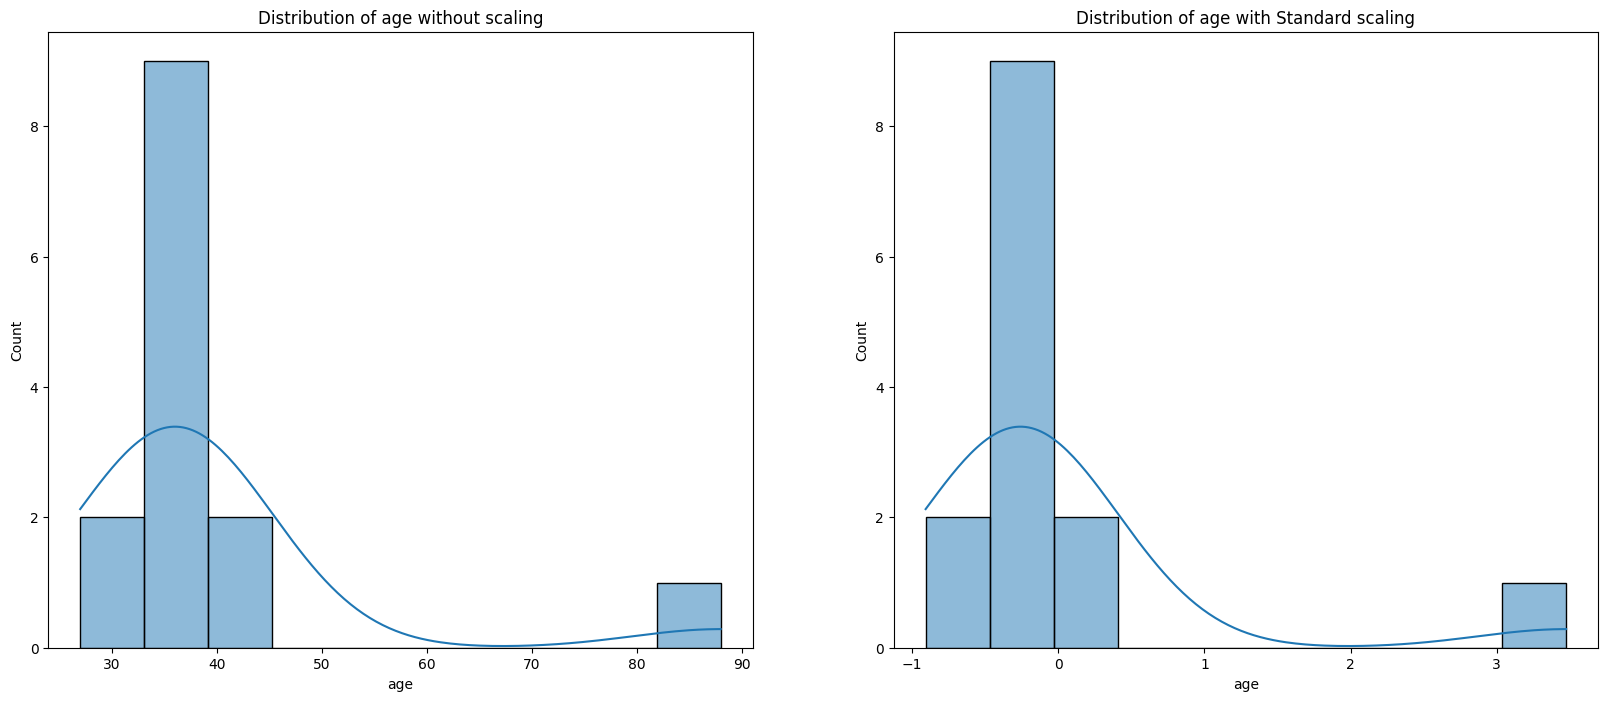

In [109]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(20,8))
sns.histplot(data=food_df.loc[:,"age"],bins=10,kde=True,ax=ax1)
sns.histplot(data=food_std_df.loc[:,"age"],bins=10,kde=True,ax=ax2)

ax1.set_title("Distribution of age without scaling")
ax2.set_title("Distribution of age with Standard scaling")
plt.show()

# Its nice to spot the outliers ( > 2 std) ie x>1  , in this case its Hana age

##### Compare heatmap

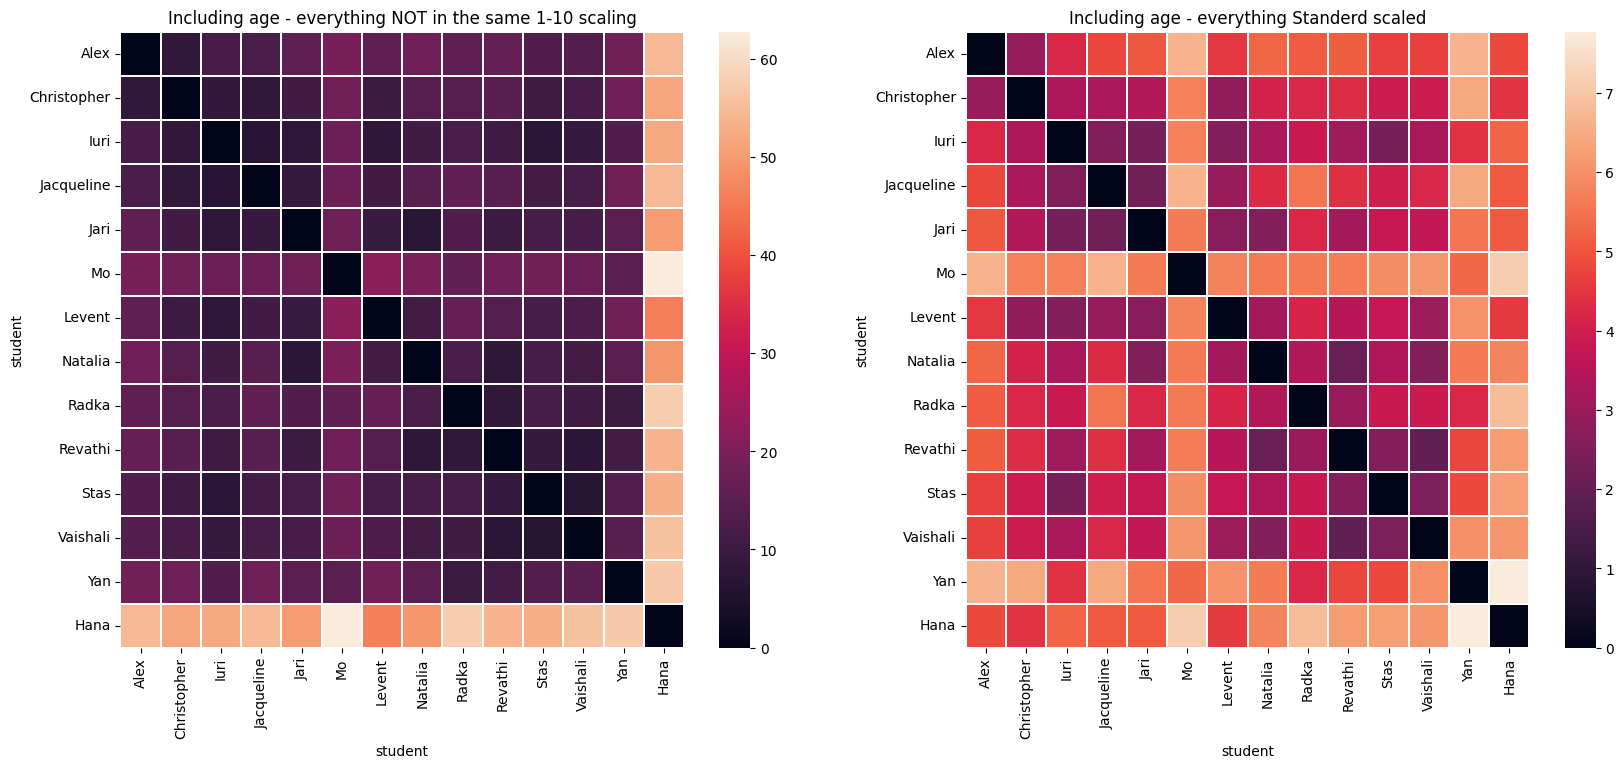

In [110]:
food_std_edis_df = pd.DataFrame(pairwise_distances(food_std_df),index=food_std_df.index,columns=food_std_df.index)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(food_edis_df, ax=ax1, linewidths=.2);
sns.heatmap(food_std_edis_df, ax=ax2, linewidths=.2);
ax1.set_title('Including age - everything NOT in the same 1-10 scaling')
ax2.set_title('Including age - everything Standerd scaled')

plt.show()

# By ensuring that all of the columns are scaled , 
# we prevent any column with a much larger scale having a much larger affect on our final output.

### Robust scaler
All of the columns get scaled between their interquartile ranges. 
The lowest value of the column equals the first quartile(25%), 
the highest value of the column equals the third quartile(75%), 
and all other values get scaled in between.
In addition to this the data gets centered around 0 as the median.

This means that the median becomes 0 and, therefore,
all values less than the median will be negative, 
and all values higher than the median will be positive.

$ newValue = \frac{oldValue - median(column)}{IQR(column)}$


RobustScaler does not scale the data into a predetermined interval like MinMaxScaler. It does not meet the strict definition of scale
> **when to use**
>   if you want to reduce the effects of outliers, relative to MinMaxScaler.

#### Use Scaler

In [111]:
# init the transformer instance , define type of output.
robust_scaler = prep.RobustScaler(
                                #   with_centering=True
                                #   , with_scaling=True
                                #   , quantile_range=(25.0, 75.0)
                                #   , copy=True
                                #   , unit_variance=False
                                  ).set_output(transform='pandas')

In [112]:
# the scaler learn about the df and store some value of each feature
robust_scaler.fit(food_df)
pd.DataFrame(
    {
        "features":robust_scaler.feature_names_in_,
        "scale":robust_scaler.scale_, #The (scaled) interquartile range for each feature
        "center":robust_scaler.center_  #The median value for each feature
    }
)

,features,scale,center
0,broccoli,1.75,8.0
1,brussels_sprouts,1.00,8.0
2,hamburger (meat),6.75,5.0
3,oysters (raw),3.00,1.5
4,onion (raw),1.00,4.0
5,peas,2.00,6.5
6,olives,1.00,8.0
7,blue_cheese,8.25,7.0
8,whisky,3.75,2.0
9,age,4.50,37.0


In [113]:
# Use the fitted transformer to actually transform the data.
food_robust_df = robust_scaler.transform(food_df)

#### Compare scaled with unscaled features

##### Compare values

In [114]:
#display the features feature before and after the transformation
round(pd.DataFrame(
    {
        "orig_age":food_df.loc[:,"age"],
        "robust_scaled_age":food_robust_df.loc[:,"age"],
        "orig_broccoli":food_df.loc[:,"broccoli"],
        "robust_scaled_broccoli":food_robust_df.loc[:,"broccoli"]
    }
).sort_values(by="orig_age"),3)

,orig_age,robust_scaled_age,orig_broccoli,robust_scaled_broccoli
student,,,,
Mo,27,-2.222,0,-4.571
Radka,33,-0.889,9,0.571
Alex,34,-0.667,8,0.000
Jacqueline,34,-0.667,7,-0.571
Vaishali,34,-0.667,9,0.571
Yan,34,-0.667,4,-2.286
Christopher,37,0.000,8,0.000
Iuri,37,0.000,8,0.000
Revathi,37,0.000,8,0.000


In [115]:
round(food_robust_df,3)

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
student,,,,,,,,,,
Alex,0.000,1.0,-0.444,2.500,2.0,0.25,0.0,0.242,1.867,-0.667
Christopher,0.000,0.0,0.000,0.500,0.0,-0.75,2.0,0.364,1.600,0.000
Iuri,0.000,-1.0,0.000,0.500,-1.0,-0.75,-2.0,0.121,-0.267,0.000
Jacqueline,-0.571,0.0,0.444,0.500,-4.0,0.25,0.0,0.364,0.267,-0.667
Jari,-0.571,0.0,0.593,-0.167,-2.0,-0.25,0.0,-0.485,0.000,0.444
Mo,-4.571,-8.0,0.296,-0.500,4.0,-1.25,1.0,-0.485,0.533,-2.222
Levent,-0.571,1.0,0.148,0.167,0.0,-0.75,2.0,0.364,-0.533,1.333
Natalia,1.143,-1.0,0.148,-0.500,1.0,0.25,1.0,-0.848,-0.533,0.889
Radka,0.571,0.0,-0.741,-0.500,2.0,-2.75,0.0,-0.848,0.267,-0.889


##### Compare distribution (Hist)

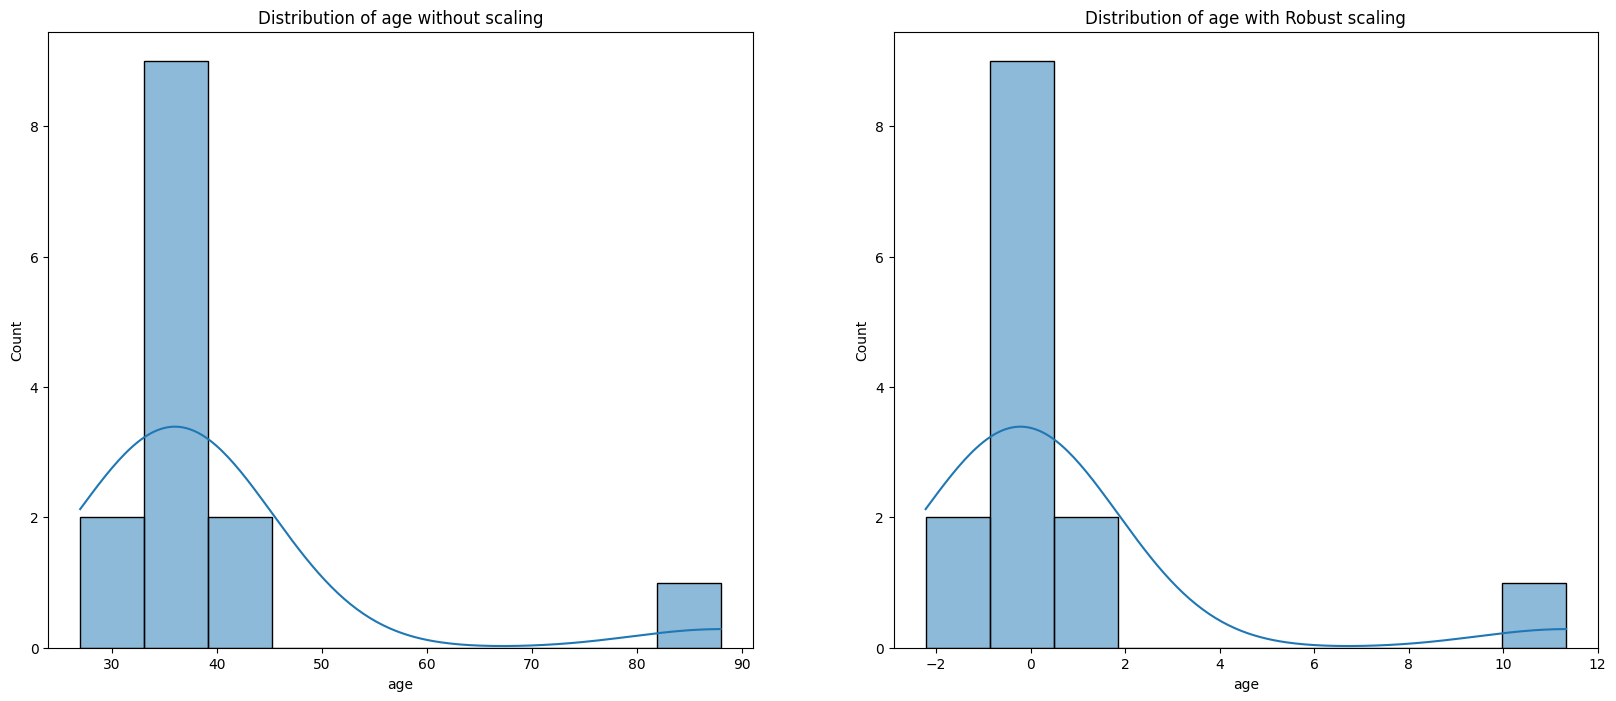

In [117]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(20,8))
sns.histplot(data=food_df.loc[:,"age"],bins=10,kde=True,ax=ax1)
sns.histplot(data=food_robust_df.loc[:,"age"],bins=10,kde=True,ax=ax2)

ax1.set_title("Distribution of age without scaling")
ax2.set_title("Distribution of age with Robust scaling")
plt.show()

##### Compare heatmap

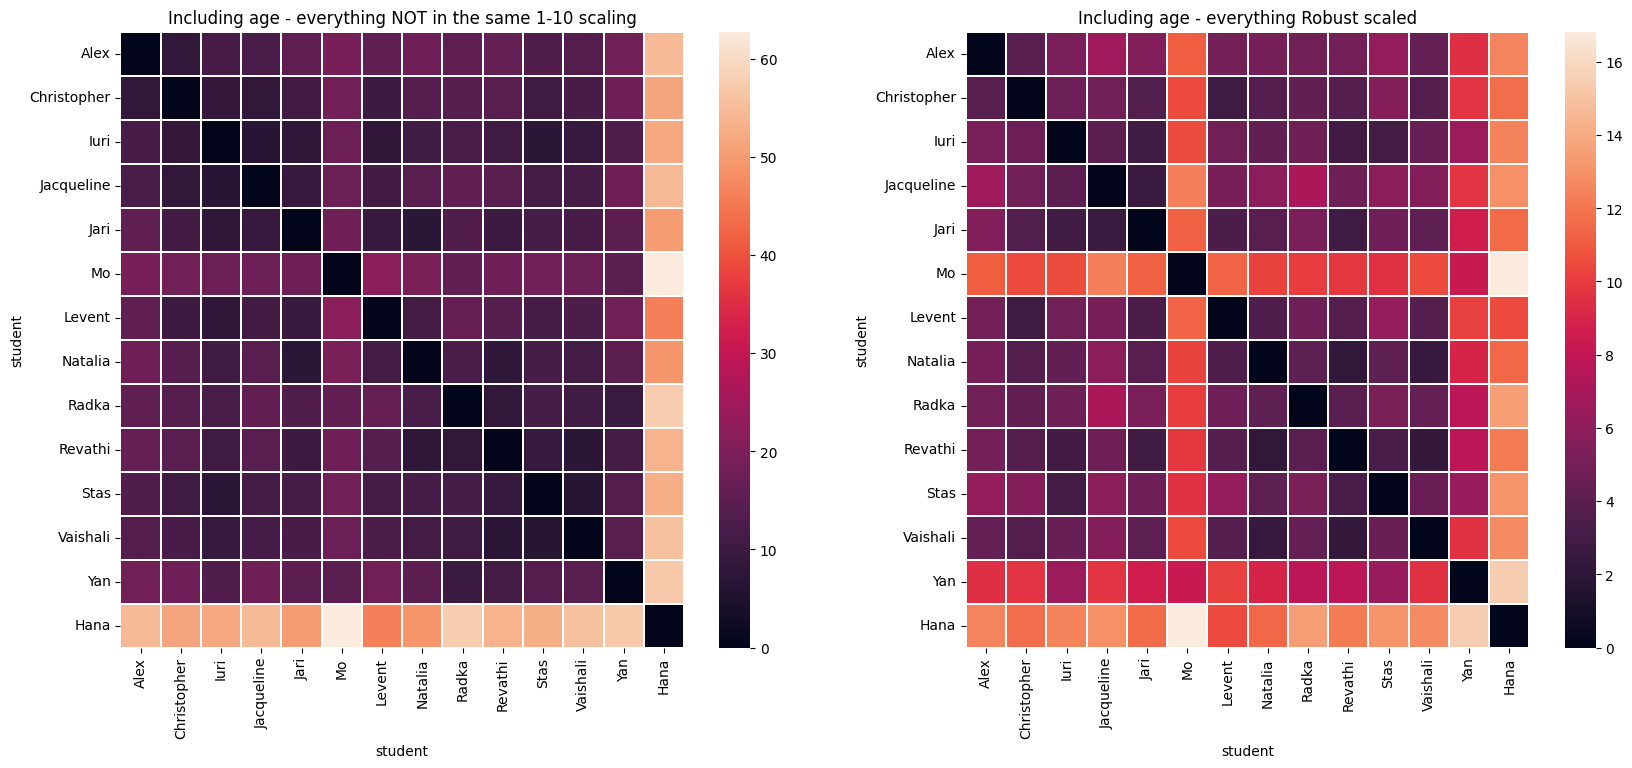

In [118]:
food_robust_edis_df = pd.DataFrame(pairwise_distances(food_robust_df),index=food_robust_df.index,columns=food_robust_df.index)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(food_edis_df, ax=ax1, linewidths=.2);
sns.heatmap(food_robust_edis_df, ax=ax2, linewidths=.2);
ax1.set_title('Including age - everything NOT in the same 1-10 scaling')
ax2.set_title('Including age - everything Robust scaled')

plt.show()

# The robust scaler can often be a good idea, 
# it's designed to help against outliers affecting the data by using the interquartile range
# instead of the full range (like the minmax scaler). 
# Unfortunately, here it hasn't helped much 
# because the interquartile range of the age column is so much larger 
# than the interquartile range of any other column, 
# and therefore the age column still distorts our concept of similarity (distance).

## Use Transformers

Transformers change the distribution to more closely resemble a normal distribution. 
Data that conforms to the normal distribution in machine learning is advantageous for model construction since it simplifies the maths. 
The assumption that the distribution is normal is explicitly used in the calculations for models 
like LDA, Gaussian Naive Bayes, Logistic Regression, Linear Regression, etc.

### Quantile Transformer
All of the columns get scaled according to their [quantile](https://en.wikipedia.org/wiki/Quantile).

> **Note:** Quantiles are divisions of the data, which tell us how much of the data is present below this point. For example, the median is the middle of the data, this is therefore a quantile of 0.5, half of the data exists at or below this point. By the same measure, 78% of the data exists at or below the quantile 0.78.

#### Use Transformer

In [119]:
# init the transformer instance , define type of output.
quantile_trans = prep.QuantileTransformer(
  #TODO: isn't easier to set num of sample (n_quantiles) to food_df.shape[0]?
                n_quantiles=food_df.shape[0]
                # , output_distribution='uniform'
                # , ignore_implicit_zeros=False
                # , subsample=10000
                # , random_state=None
                # , copy=True
                ).set_output(transform='pandas')

  

In [130]:
quantile_trans.n_features_in_

10

In [131]:
# the scaler learn about the df and store some value of each feature
quantile_trans.fit(food_df)
#TODO: anyone could access the attribues of the trans?
# pd.DataFrame(
# quantile_trans.quantiles_,columns=quantile_trans.feature_names_in_
# )

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,3.0,0.0,0.0,27.0
1,4.0,3.0,0.0,0.000000e+00,2.0,1.0,6.0,0.0,0.0,33.0
2,5.0,5.0,0.0,0.000000e+00,3.0,4.0,6.0,0.0,0.0,34.0
3,7.0,7.0,0.0,0.000000e+00,4.0,5.0,8.0,0.0,0.0,34.0
4,7.0,7.0,0.0,0.000000e+00,4.0,5.0,8.0,3.0,0.0,34.0
5,7.0,7.0,2.0,8.881784e-16,4.0,5.0,8.0,3.0,1.0,34.0
6,8.0,8.0,5.0,1.000000e+00,4.0,6.0,8.0,6.0,2.0,37.0
7,8.0,8.0,5.0,2.000000e+00,4.0,7.0,8.0,8.0,2.0,37.0
8,8.0,8.0,6.0,3.000000e+00,5.0,7.0,9.0,8.0,3.0,37.0
9,8.0,8.0,6.0,3.000000e+00,5.0,7.0,9.0,9.0,3.0,37.0


In [134]:
# Use the fitted transformer to actually transform the data.
food_quant_trans_df = quantile_trans.transform(food_df)

#### Compare scaled with unscaled features

##### Compare values

In [148]:
#display the features feature before and after the transformation
round(pd.DataFrame(
    {
        "orig_age":food_df.loc[:,"age"],
        "quant_trans_age":food_quant_trans_df.loc[:,"age"],
        "orig_broccoli":food_df.loc[:,"broccoli"],
        "quant_trans_broccoli":food_quant_trans_df.loc[:,"broccoli"]
    }
).sort_values(by="orig_age"),3)

,orig_age,quant_trans_age,orig_broccoli,quant_trans_broccoli
student,,,,
Mo,27,0.000,0,0.000
Radka,33,0.077,9,0.769
Alex,34,0.269,8,0.577
Jacqueline,34,0.269,7,0.269
Vaishali,34,0.269,9,0.769
Yan,34,0.269,4,0.077
Christopher,37,0.577,8,0.577
Iuri,37,0.577,8,0.577
Revathi,37,0.577,8,0.577


In [136]:
round(food_quant_trans_df,3)

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
student,,,,,,,,,,
Alex,0.577,1.000,0.385,1.000,0.885,0.731,0.385,0.692,1.000,0.269
Christopher,0.577,0.615,0.462,0.692,0.346,0.269,1.000,1.000,0.923,0.577
Iuri,0.577,0.269,0.462,0.692,0.154,0.269,0.115,0.577,0.385,0.577
Jacqueline,0.269,0.615,0.885,0.692,0.000,0.731,0.385,1.000,0.654,0.269
Jari,0.269,0.615,1.000,0.462,0.077,0.462,0.385,0.308,0.462,0.769
Mo,0.000,0.000,0.769,0.000,1.000,0.154,0.654,0.308,0.769,0.000
Levent,0.269,1.000,0.654,0.538,0.346,0.269,1.000,1.000,0.000,0.923
Natalia,1.000,0.269,0.654,0.000,0.654,0.731,0.654,0.000,0.000,0.846
Radka,0.769,0.615,0.000,0.000,0.885,0.077,0.385,0.000,0.654,0.077


##### Compare distribution (Hist)

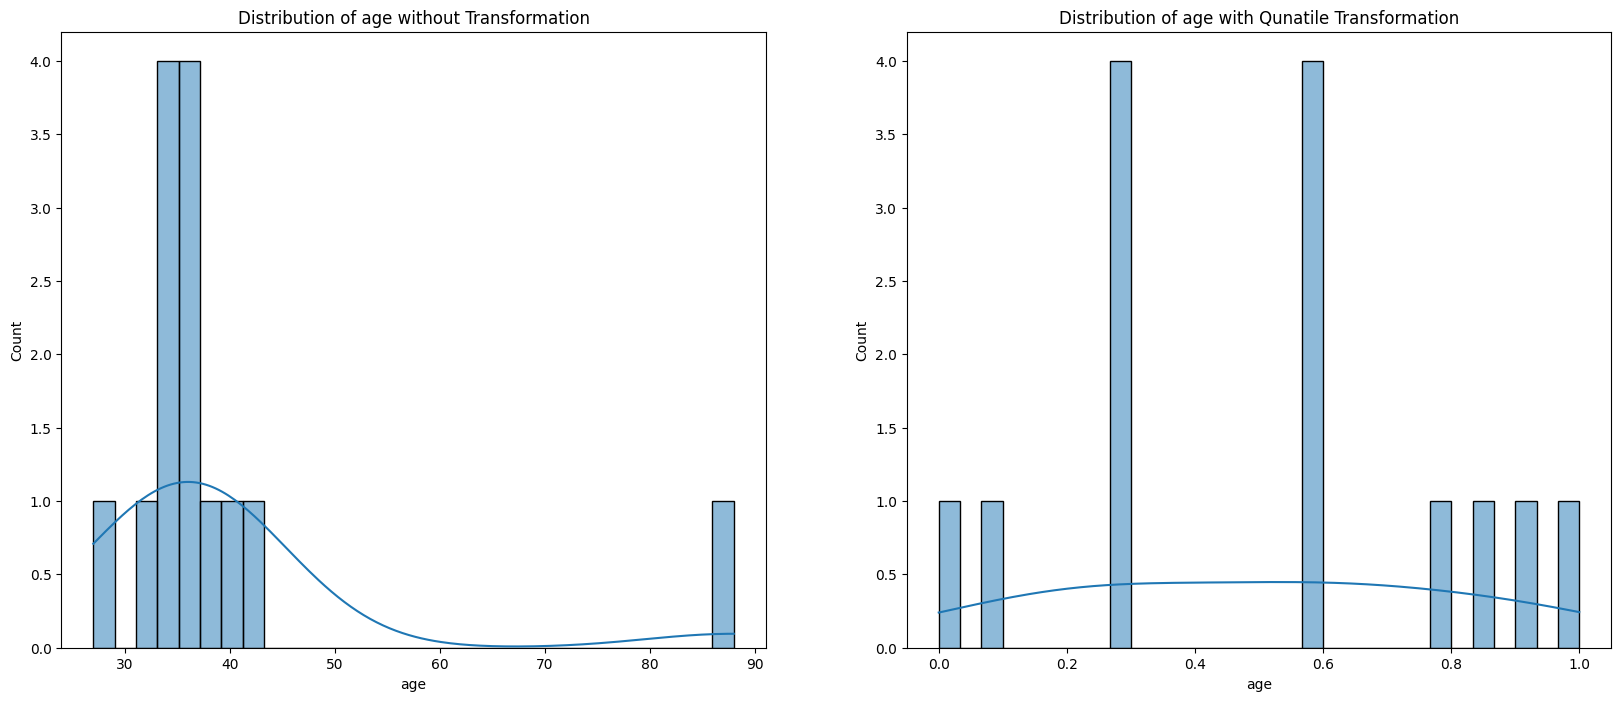

In [139]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(20,8))
sns.histplot(data=food_df.loc[:,"age"],bins=30,kde=True,ax=ax1)
sns.histplot(data=food_quant_trans_df.loc[:,"age"],bins=30,kde=True,ax=ax2)

ax1.set_title("Distribution of age without Transformation")
ax2.set_title("Distribution of age with Qunatile Transformation")
plt.show()

##### Compare heatmap

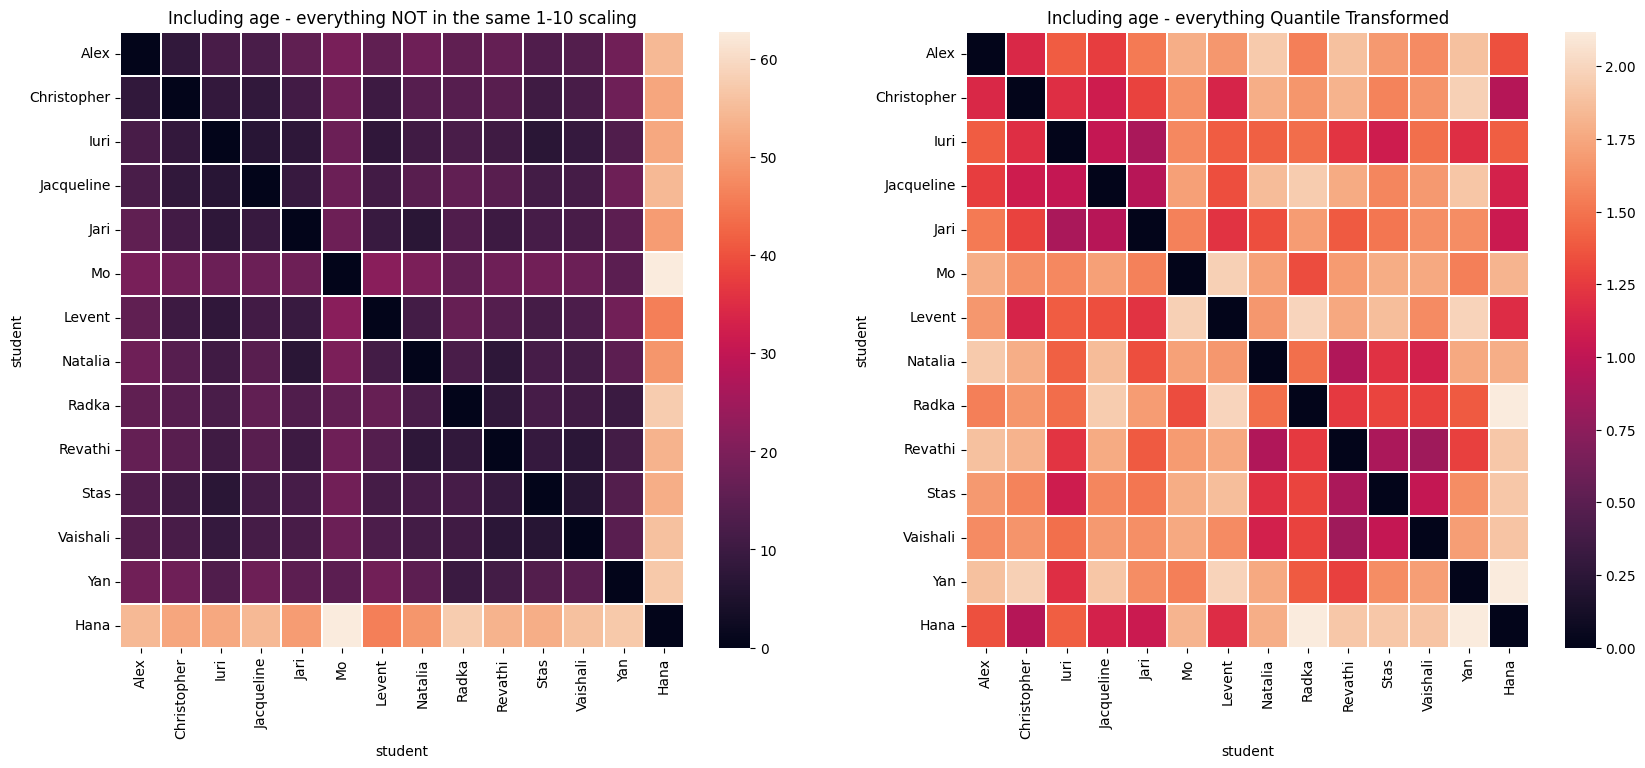

In [141]:
food_quant_trans_edis_df = pd.DataFrame(pairwise_distances(food_quant_trans_df),index=food_quant_trans_df.index,columns=food_quant_trans_df.index)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(food_edis_df, ax=ax1, linewidths=.2);
sns.heatmap(food_quant_trans_edis_df, ax=ax2, linewidths=.2);
ax1.set_title('Including age - everything NOT in the same 1-10 scaling')
ax2.set_title('Including age - everything Quantile Transformed')

plt.show()

### Power Transformer
Power transformers transform the data via [power functions](https://en.wikipedia.org/wiki/Power_transform). They can use either the Yeo-Johnson transformation, or the Box-Cox transformation. You don't need to understand the maths behind this one, just know that it reshapes the data to more closely resemble the normal distribution.

#### Use Transformer

In [144]:
# init the transformer instance , define type of output.
power_trans = prep.PowerTransformer(
                        # method='yeo-johnson'
                        # , standardize=True  #Set to True to apply zero-mean, unit-variance normalization to the transformed output.
                        # , copy=True
                      ).set_output(transform='pandas')

  

In [145]:
# the Transformer learn about the df and store some value of each feature
power_trans.fit(food_df)
pd.DataFrame(
    {
        "features":power_trans.feature_names_in_,
        "lambdas":power_trans.lambdas_
    }
)

,features,lambdas
0,broccoli,1.989825
1,brussels_sprouts,2.490765
2,hamburger (meat),0.454791
3,oysters (raw),-0.299855
4,onion (raw),1.219696
5,peas,1.692209
6,olives,3.006069
7,blue_cheese,0.675210
8,whisky,-0.073755
9,age,-2.298481


In [146]:
# Use the fitted transformer to actually transform the data.
food_power_trans_df = power_trans.transform(food_df)

#### Compare scaled with unscaled features

##### Compare values

In [147]:
#display the features feature before and after the transformation
round(pd.DataFrame(
    {
        "orig_age":food_df.loc[:,"age"],
        "power_trans_age":food_power_trans_df.loc[:,"age"],
        "orig_broccoli":food_df.loc[:,"broccoli"],
        "power_trans_broccoli":food_power_trans_df.loc[:,"broccoli"]
    }
).sort_values(by="orig_age"),3)

,orig_age,power_trans_age,orig_broccoli,power_trans_broccoli
student,,,,
Mo,27,-2.482,0,-2.170
Radka,33,-0.622,9,0.817
Alex,34,-0.409,8,0.246
Jacqueline,34,-0.409,7,-0.265
Vaishali,34,-0.409,9,0.817
Yan,34,-0.409,4,-1.441
Christopher,37,0.124,8,0.246
Iuri,37,0.124,8,0.246
Revathi,37,0.124,8,0.246


In [149]:
round(food_power_trans_df,3)

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
student,,,,,,,,,,
Alex,0.246,1.292,-0.368,1.586,0.953,0.633,-0.227,0.866,1.539,-0.409
Christopher,0.246,0.501,0.461,0.742,-0.203,-0.395,1.388,1.056,1.424,0.124
Iuri,0.246,-0.169,0.461,0.742,-0.746,-0.395,-1.261,0.669,-0.316,0.124
Jacqueline,-0.265,0.501,1.082,0.742,-2.161,0.633,-0.227,1.056,0.510,-0.409
Jari,-0.265,0.501,1.263,-0.069,-1.259,0.094,-0.227,-0.456,0.172,0.409
Mo,-2.170,-2.123,0.889,-1.068,2.184,-0.830,0.500,-0.456,0.767,-2.482
Levent,-0.265,1.292,0.684,0.426,-0.203,-0.395,1.388,1.056,-1.185,0.857
Natalia,1.448,-0.169,0.684,-1.068,0.364,0.633,0.500,-1.395,-1.185,0.651
Radka,0.817,0.501,-1.247,-1.068,0.953,-1.778,-0.227,-1.395,0.510,-0.622


##### Compare distribution (Hist)

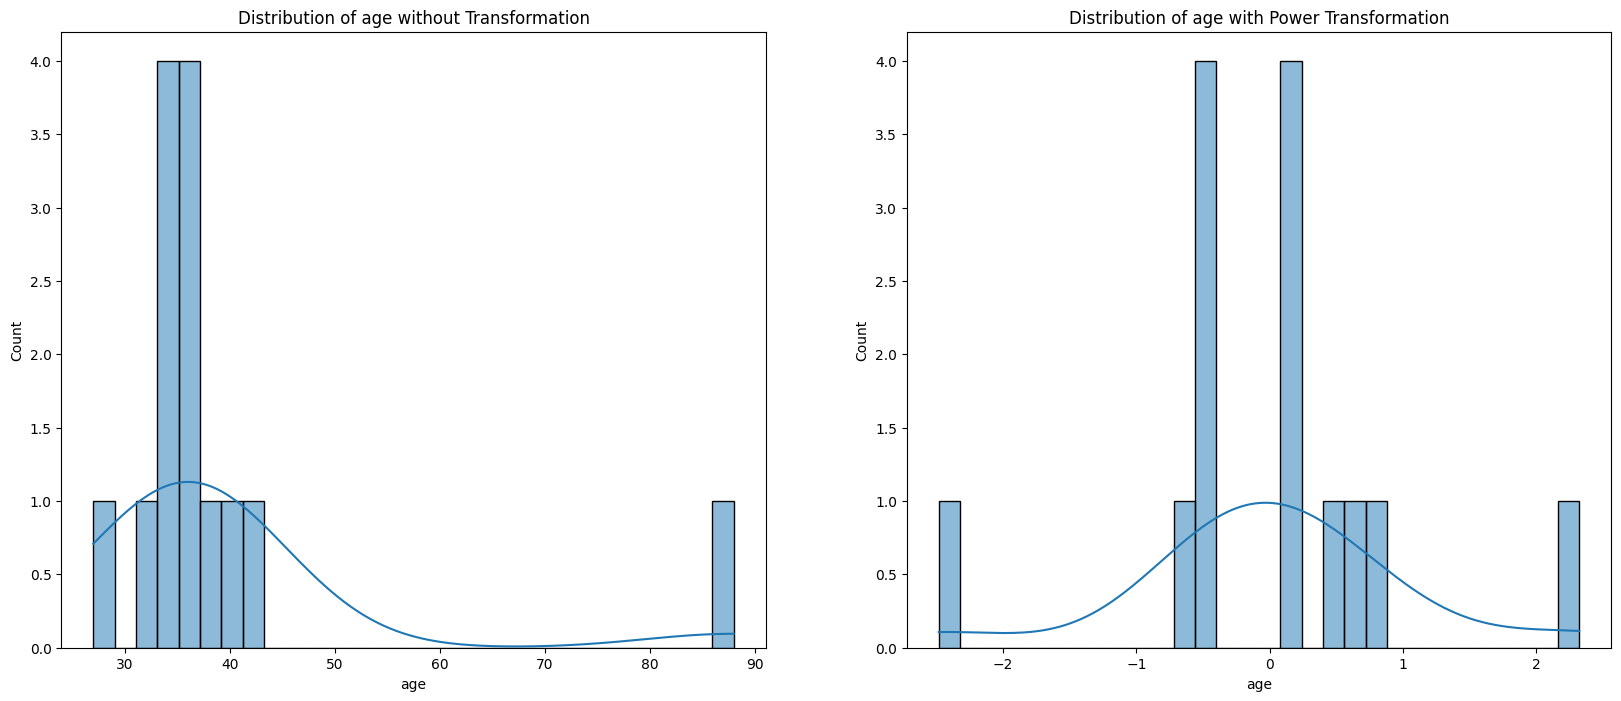

In [150]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(20,8))
sns.histplot(data=food_df.loc[:,"age"],bins=30,kde=True,ax=ax1)
sns.histplot(data=food_power_trans_df.loc[:,"age"],bins=30,kde=True,ax=ax2)

ax1.set_title("Distribution of age without Transformation")
ax2.set_title("Distribution of age with Power Transformation")
plt.show()

##### Compare heatmap

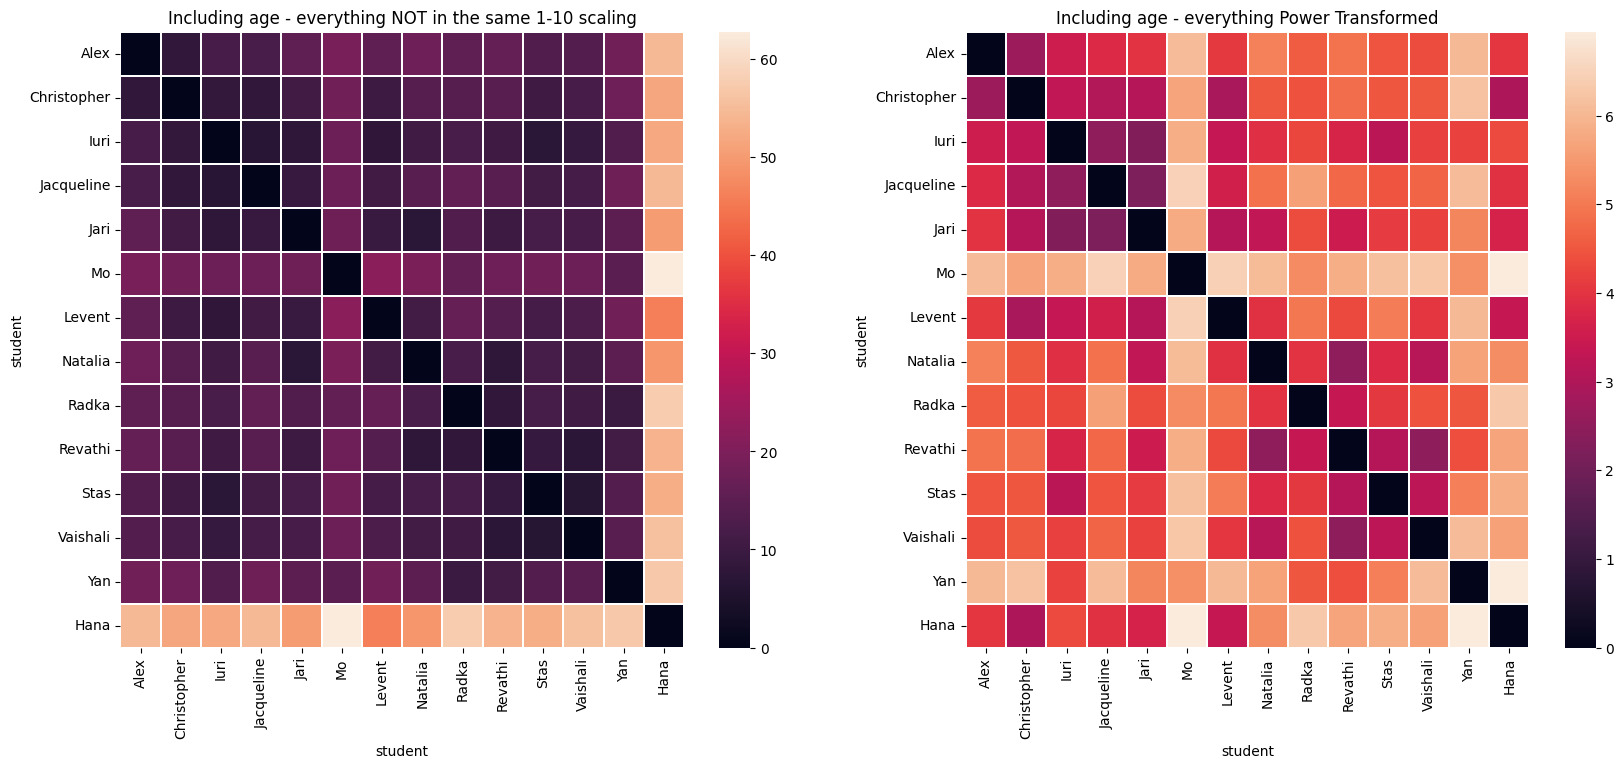

In [151]:
food_power_trans_edis_df = pd.DataFrame(pairwise_distances(food_power_trans_df),index=food_power_trans_df.index,columns=food_power_trans_df.index)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(food_edis_df, ax=ax1, linewidths=.2);
sns.heatmap(food_power_trans_edis_df, ax=ax2, linewidths=.2);
ax1.set_title('Including age - everything NOT in the same 1-10 scaling')
ax2.set_title('Including age - everything Power Transformed')

plt.show()

## Compare all Together

### All histograms

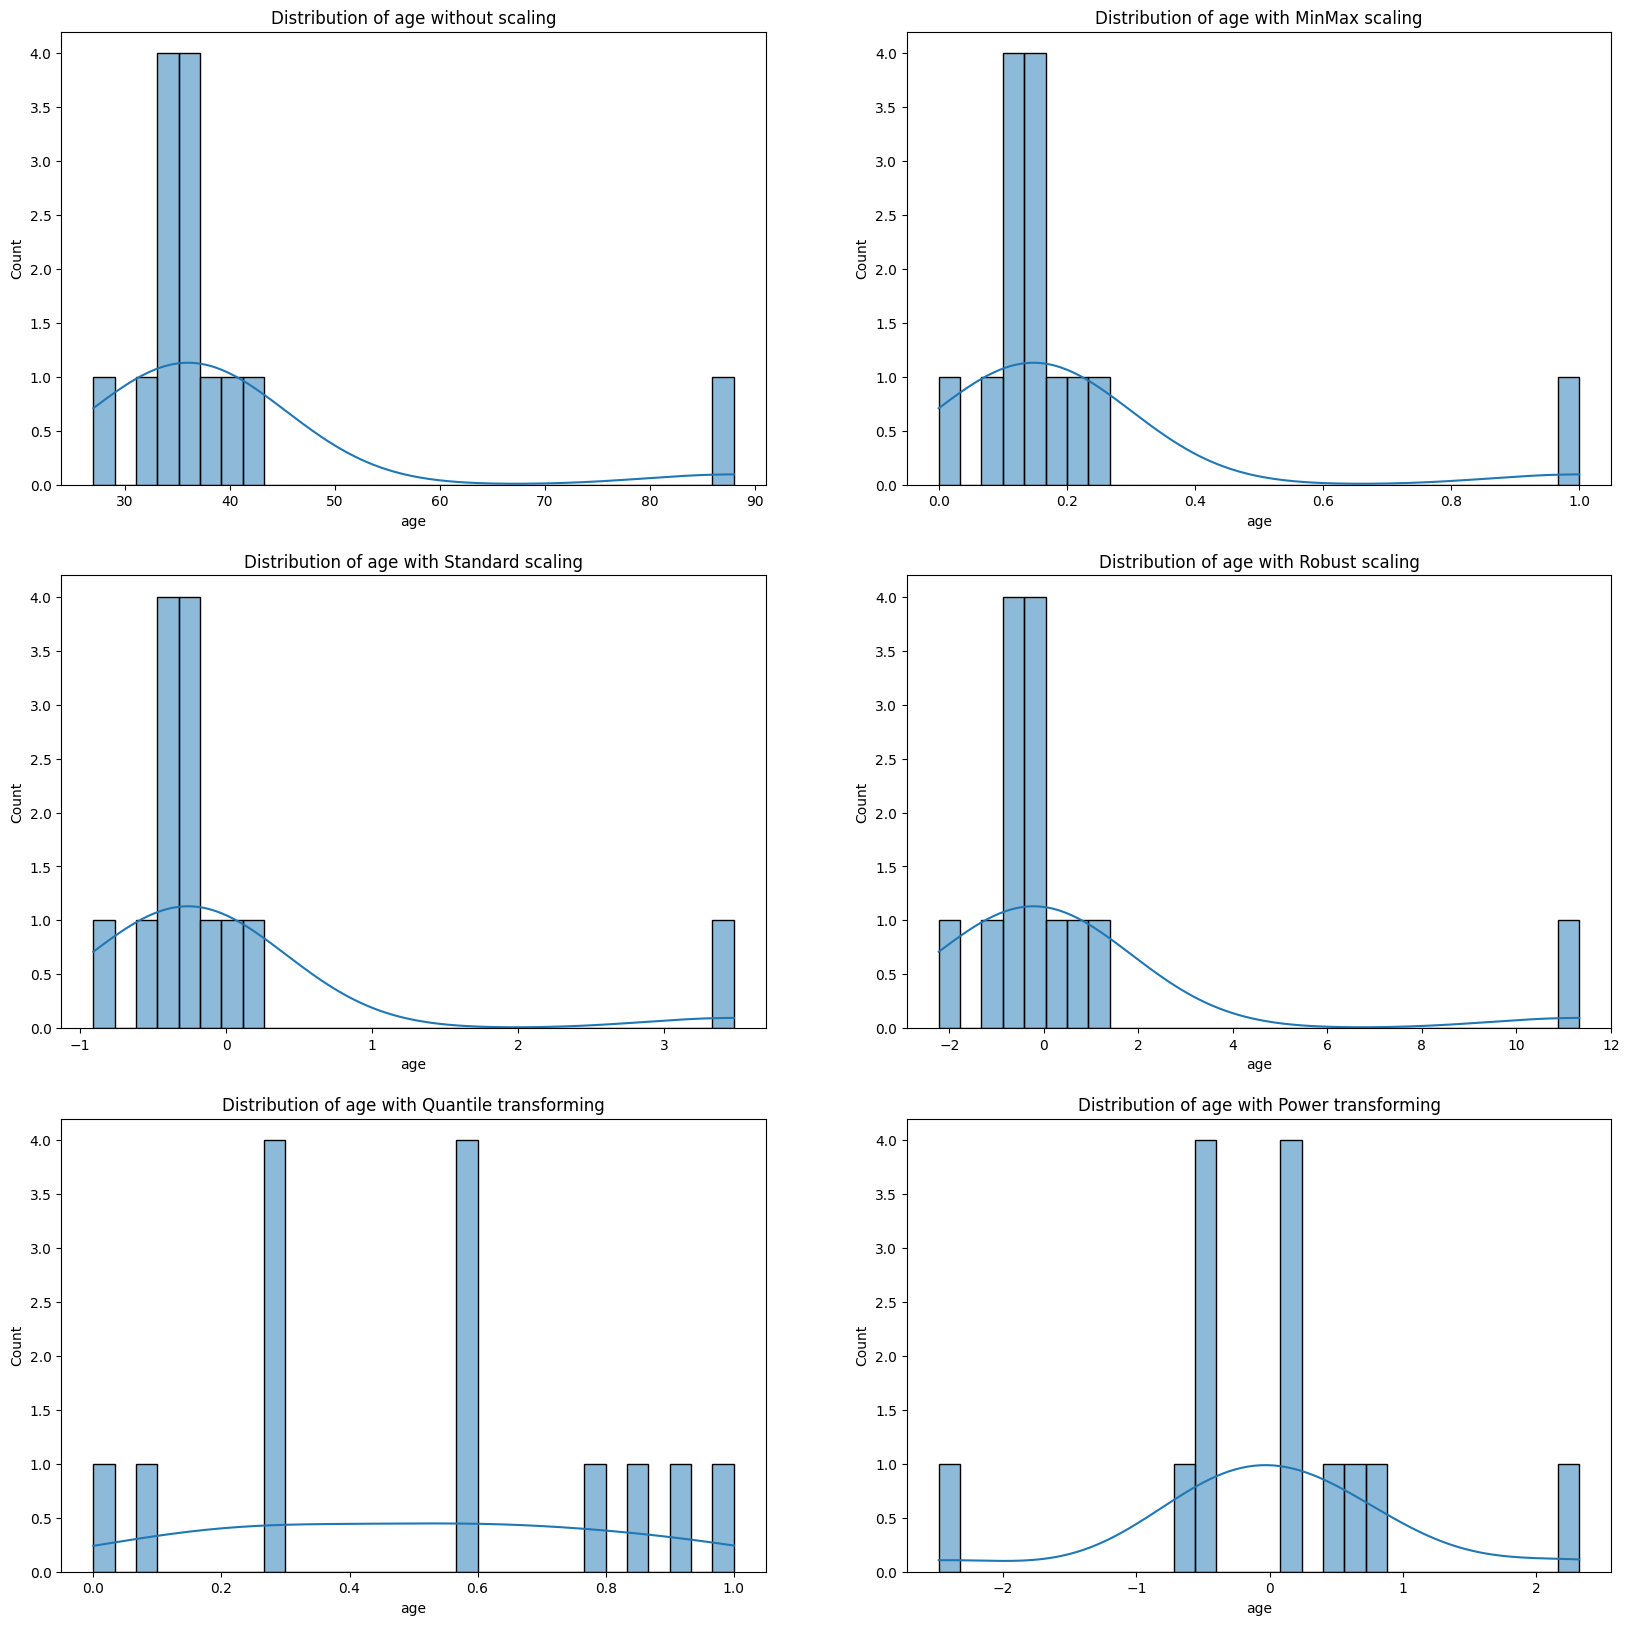

In [155]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

sns.histplot(data=food_df.iloc[:,-1], bins=30, kde=True, ax=ax[0, 0]);
sns.histplot(data=food_minmax_df.iloc[:,-1], bins=30, kde=True, ax=ax[0, 1]);

sns.histplot(data=food_std_df.iloc[:,-1], bins=30, kde=True, ax=ax[1, 0]);
sns.histplot(data=food_robust_df.iloc[:,-1], bins=30, kde=True, ax=ax[1, 1]);

sns.histplot(data=food_quant_trans_df.iloc[:,-1], bins=30, kde=True, ax=ax[2, 0]);
sns.histplot(data=food_power_trans_df.iloc[:,-1], bins=30, kde=True, ax=ax[2, 1]);

ax[0, 0].set_title('Distribution of age without scaling')
ax[0, 1].set_title('Distribution of age with MinMax scaling')
ax[1, 0].set_title('Distribution of age with Standard scaling')
ax[1, 1].set_title('Distribution of age with Robust scaling')
ax[2, 0].set_title('Distribution of age with Quantile transforming')
ax[2, 1].set_title('Distribution of age with Power transforming')

plt.show()

### All heatmaps

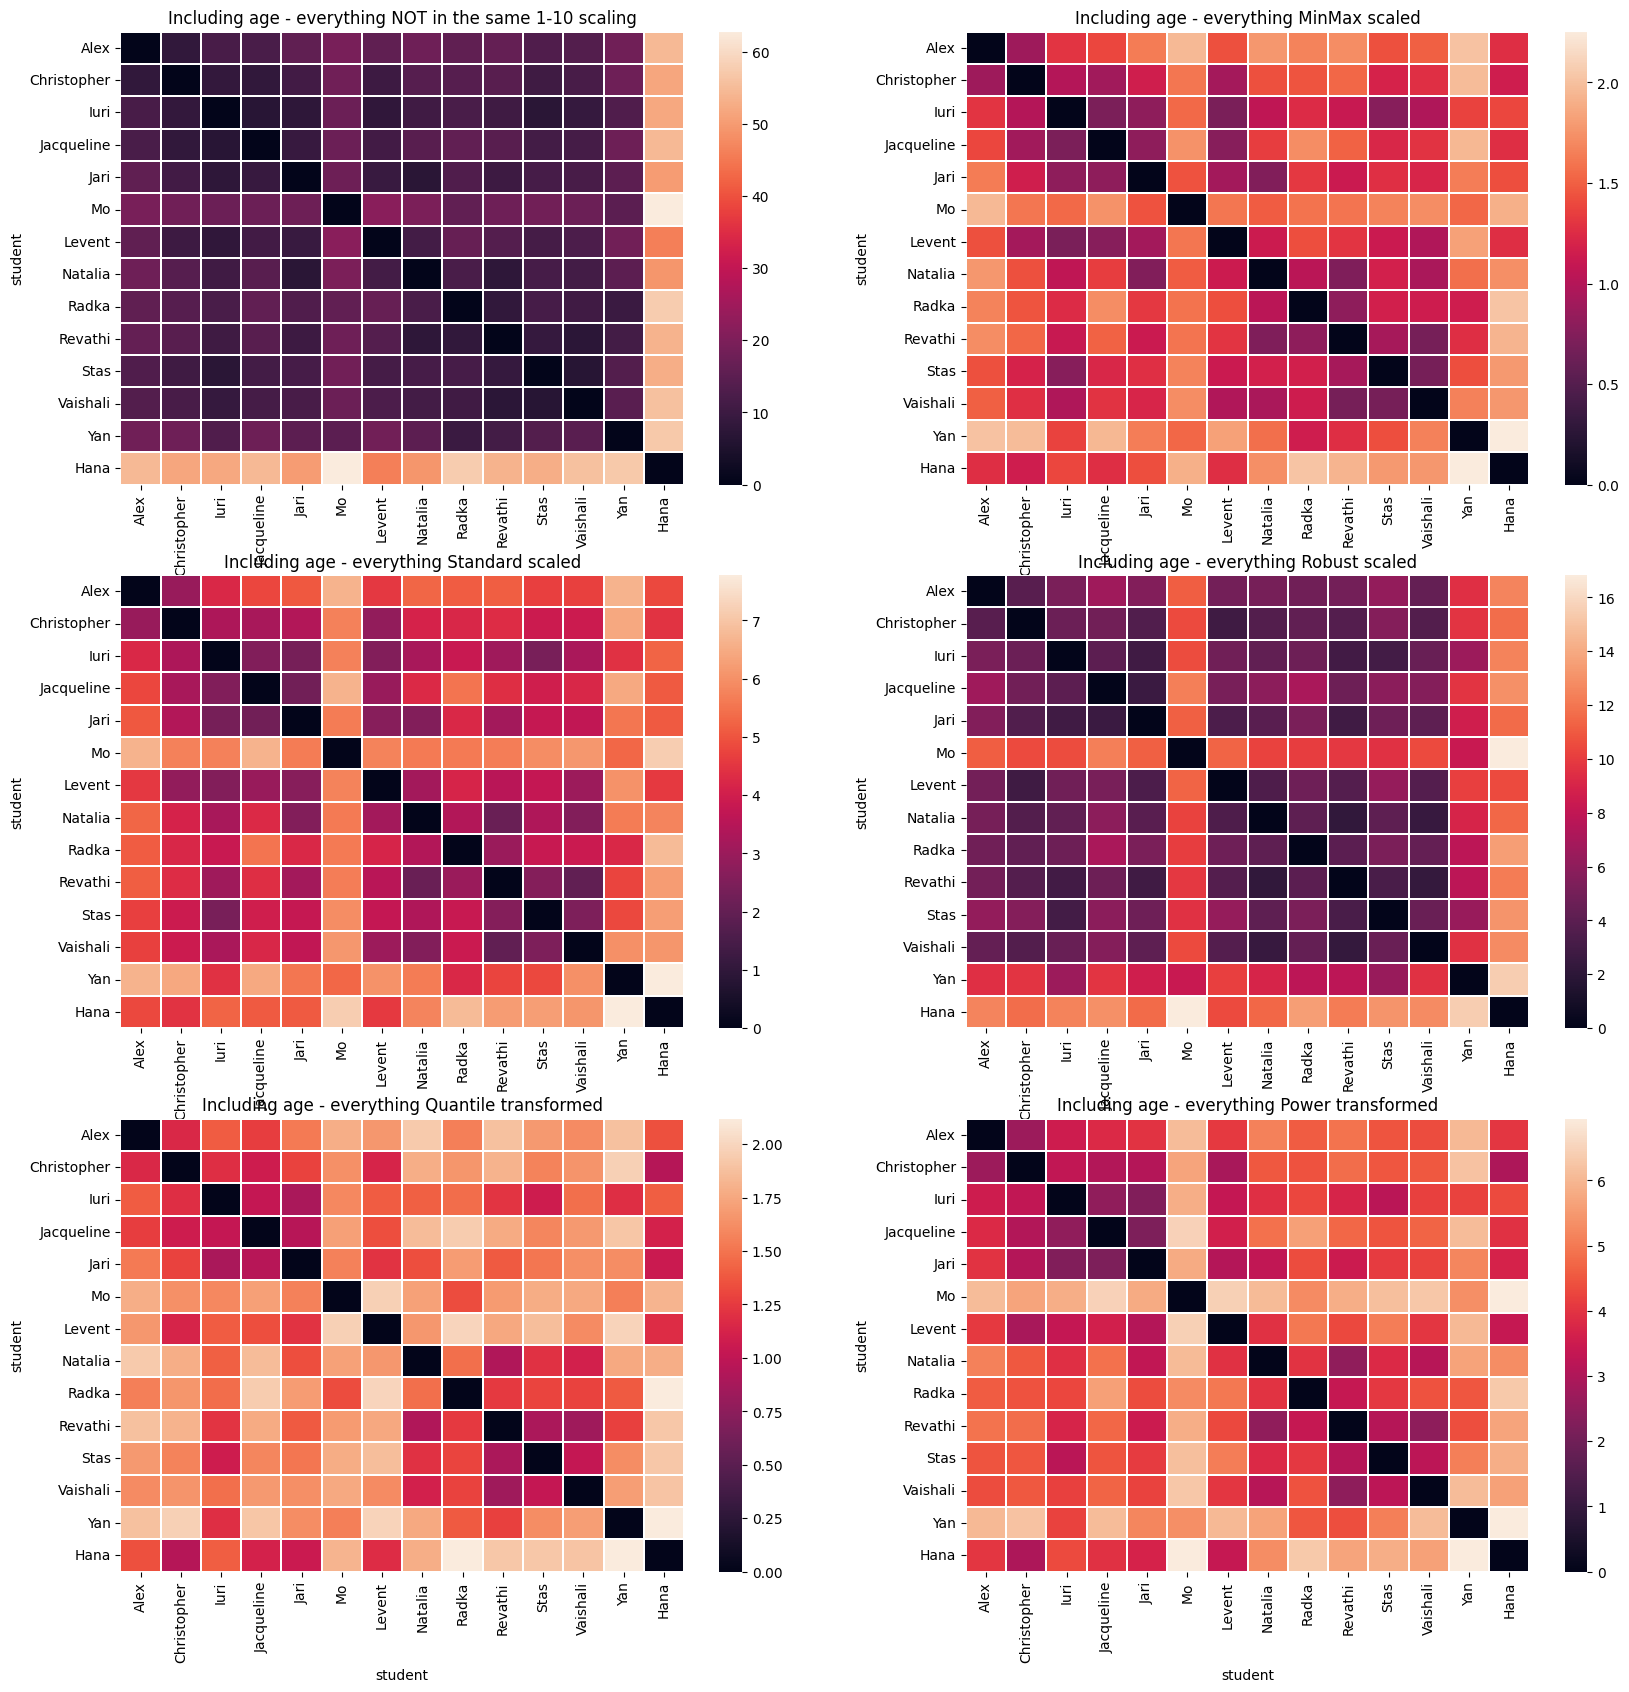

In [156]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

sns.heatmap(food_edis_df, ax=ax[0, 0], linewidths=.2);
sns.heatmap(food_minmax_edis_df, ax=ax[0, 1], linewidths=.2);
sns.heatmap(food_std_edis_df, ax=ax[1, 0], linewidths=.2);
sns.heatmap(food_robust_edis_df, ax=ax[1, 1], linewidths=.2);
sns.heatmap(food_quant_trans_edis_df, ax=ax[2, 0], linewidths=.2);
sns.heatmap(food_power_trans_edis_df, ax=ax[2, 1], linewidths=.2);

ax[0, 0].set_title('Including age - everything NOT in the same 1-10 scaling')
ax[0, 1].set_title('Including age - everything MinMax scaled')
ax[1, 0].set_title('Including age - everything Standard scaled')
ax[1, 1].set_title('Including age - everything Robust scaled')
ax[2, 0].set_title('Including age - everything Quantile transformed')
ax[2, 1].set_title('Including age - everything Power transformed')

plt.show()

# 1000 Song Example

In [ ]:

all_songs_df = pd.read_csv("df_audio_features_1000.csv" 
                           #,index_col=["name", "artist"]
                           )
all_songs_df

In [ ]:
all_songs_df.info()

In [ ]:
from sklearn import preprocessing as prep
#1. drop feature with string type / and all Null column
all_songs_df = all_songs_df.drop(["name","artist","id","html","type"],axis=1)
# 2. initialize the transformer (optionally, set parameters)
my_min_max = prep.MinMaxScaler(feature_range=(0,1))
# 3. fit the transformer to the data
my_min_max.fit(all_songs_df)
# 4. use the transformer to transform the data
scaled_all_songs = my_min_max.transform(all_songs_df)
scaled_all_songs

In [ ]:
# 5. reconvert the transformed data back to a DataFrame
scaled_all_songs_df= pd.DataFrame(scaled_all_songs
                                  ,index=all_songs_df.index
                                  ,columns=all_songs_df.columns)
scaled_all_songs_df

In [ ]:
scaled_all_songs_df.describe()

In [ ]:
from sklearn.metrics import pairwise

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(pd.DataFrame(pairwise.euclidean_distances(scaled_all_songs_df), index=scaled_all_songs_df.index, columns=scaled_all_songs_df.index), ax=ax)